In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("sales_data.csv")
df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [3]:
df.shape

(1000, 14)

In [4]:
df.columns

Index(['Product_ID', 'Sale_Date', 'Sales_Rep', 'Region', 'Sales_Amount',
       'Quantity_Sold', 'Product_Category', 'Unit_Cost', 'Unit_Price',
       'Customer_Type', 'Discount', 'Payment_Method', 'Sales_Channel',
       'Region_and_Sales_Rep'],
      dtype='object')

In [5]:
df.isnull().sum().sort_values(ascending = True)

Product_ID              0
Sale_Date               0
Sales_Rep               0
Region                  0
Sales_Amount            0
Quantity_Sold           0
Product_Category        0
Unit_Cost               0
Unit_Price              0
Customer_Type           0
Discount                0
Payment_Method          0
Sales_Channel           0
Region_and_Sales_Rep    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


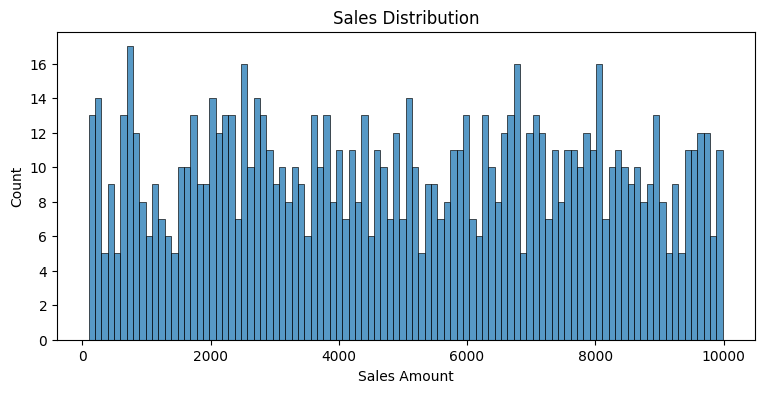

In [7]:
#distribution of total sales amount
plt.figure(figsize = (9,4))
sns.histplot(data = df, x = "Sales_Amount", bins = 100)
plt.title("Sales Distribution")
plt.xlabel("Sales Amount")
plt.show()

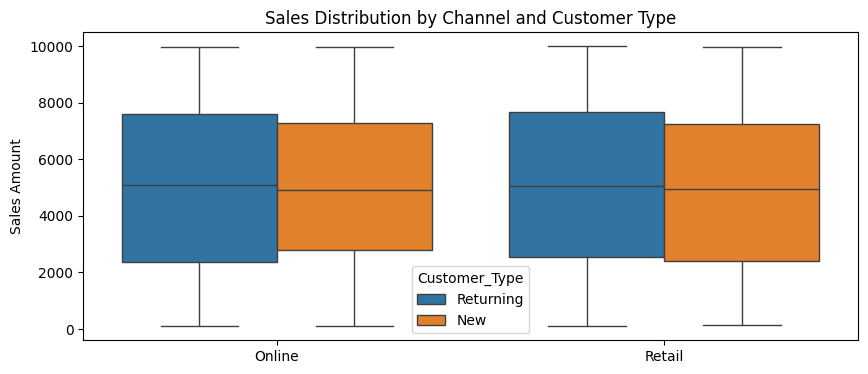

In [8]:
#sales distribution by customer type
plt.figure(figsize = (10,4))
sns.boxplot(data = df, y = "Sales_Amount", x = "Sales_Channel", hue = "Customer_Type")
plt.title("Sales Distribution by Channel and Customer Type")
plt.xlabel("")
plt.ylabel("Sales Amount")
plt.show()

In [9]:
df.Region.unique()

array(['North', 'West', 'South', 'East'], dtype=object)

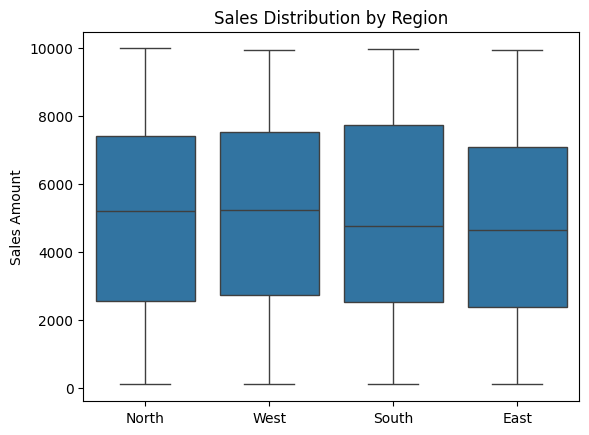

In [10]:
#distribution of sales amount by region
sns.boxplot(data = df, y = "Sales_Amount", x = "Region")
plt.title("Sales Distribution by Region")
plt.ylabel("Sales Amount")
plt.xlabel("")
plt.show()

In [11]:
df.Sales_Rep.unique()

array(['Bob', 'David', 'Charlie', 'Eve', 'Alice'], dtype=object)

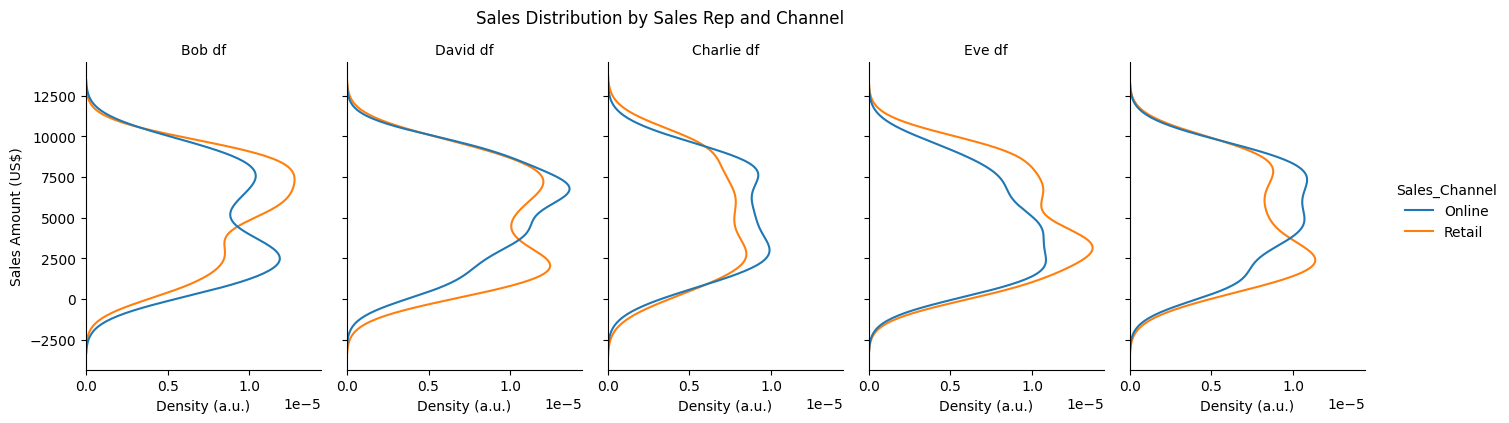

In [12]:
#distribution of sales by channel and sales rep
g = sns.displot(
    data=df, y="Sales_Amount", hue="Sales_Channel", col="Sales_Rep",
    kind="kde", height=4, aspect=.7,
)
g.set_axis_labels("Density (a.u.)", "Sales Amount (US$)")
g.set_titles("{col_name} df")

plt.title("Sales Distribution by Sales Rep and Channel",  y= 1.1, x = -2, fontsize = 12)
plt.show()

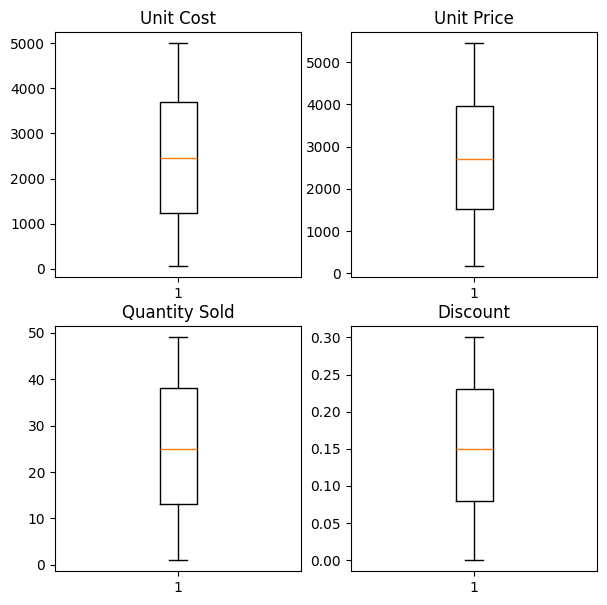

In [13]:
#distribution of unit cost, unit price, quantity sold and discount
plt.figure(figsize = (7, 7))
plt.subplot(2, 2, 1)
plt.boxplot(df["Unit_Cost"])
plt.title("Unit Cost")

plt.subplot(2, 2, 2)
plt.boxplot(df["Unit_Price"])
plt.title("Unit Price")

plt.subplot(2, 2, 3)
plt.boxplot(df["Quantity_Sold"])
plt.title("Quantity Sold")

plt.subplot(2, 2, 4)
plt.boxplot(df["Discount"])
plt.title("Discount")

plt.show()

## Summary Statistics

In [14]:
df.describe()

,Product_ID,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Discount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1050.128000,5019.265230,25.355000,2475.304550,2728.440120,0.15239
std,29.573505,2846.790126,14.159006,1417.872546,1419.399839,0.08720
min,1001.000000,100.120000,1.000000,60.280000,167.120000,0.00000
25%,1024.000000,2550.297500,13.000000,1238.380000,1509.085000,0.08000
50%,1051.000000,5019.300000,25.000000,2467.235000,2696.400000,0.15000
75%,1075.000000,7507.445000,38.000000,3702.865000,3957.970000,0.23000
max,1100.000000,9989.040000,49.000000,4995.300000,5442.150000,0.30000


In [15]:
df.Product_Category.unique()

array(['Furniture', 'Food', 'Clothing', 'Electronics'], dtype=object)

## Sales by Region and product category

In [16]:
sales_by_region = df.groupby(["Region", "Product_Category"]).agg({
    'Sales_Amount': ['mean', "sum"], 
    "Quantity_Sold": ["mean", "sum"],
    "Unit_Price": "mean"}).round(2)

sales_by_region

Sales_Amount            Quantity_Sold       Unit_Price
                                mean        sum          mean   sum       mean
Region Product_Category                                                       
East   Clothing              4693.03  356670.40         23.64  1797    2694.47
       Electronics           4663.10  303101.42         24.97  1623    2823.80
       Food                  5172.46  325864.87         23.22  1463    2729.85
       Furniture             4646.72  274156.24         24.97  1473    2701.27
North  Clothing              4907.59  372977.22         25.51  1939    2507.59
       Electronics           5271.79  342666.29         25.54  1660    2702.52
       Food                  5395.53  258985.65         24.56  1179    3166.78
       Furniture             5063.89  394983.35         24.71  1927    2630.29
South  Clothing              4900.32  269517.74         27.58  1517    2947.40
       Electronics           5152.00  293663.96         22.35  1274    2702.29
       Food                  5192.89  301187.51         27.19  1577    2434.67
       Furniture             5176.46  289881.65         25.71  1440    2744.06
West   Clothing              5152.61  314309.00         27.36  1669    2816.94
       Electronics           5153.69  304067.97         26.08  1539    2955.59
       Food                  5539.22  315735.51         24.37  1389    2376.65
       Furniture             4499.95  301496.45         28.19  1889    2875.40

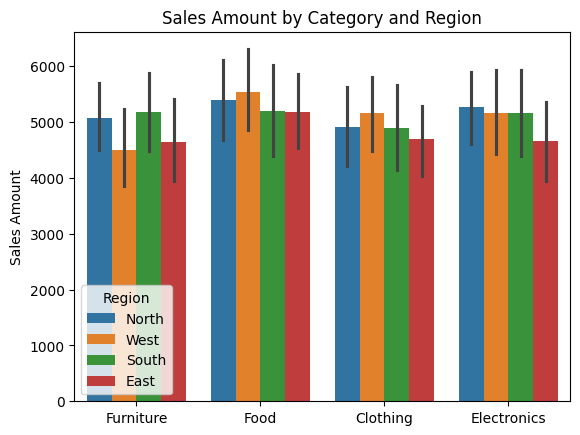

In [17]:
sns.barplot(data = df, x = "Product_Category", y = "Sales_Amount", hue = "Region")
plt.title("Sales Amount by Category and Region")
plt.ylabel("Sales Amount")
plt.xlabel("")
plt.show()

## How much revenue did each sales rep generate from each category

In [18]:
by_rep = df.groupby(["Sales_Rep", "Product_Category"]).agg(
    new_customers = ("Customer_Type", lambda x: x[df["Customer_Type"] == "New"].count()),
    returning_customers = ("Customer_Type", lambda x: x[df["Customer_Type"] == "Returning"].count()),
    quantity_sold = ("Quantity_Sold", "sum"),
    online_sales = ('Sales_Amount', lambda x: x[df["Sales_Channel"] == 'Online'].sum()),
    Retail_sales = ("Sales_Amount", lambda x: x[df["Sales_Channel"] == "Retail"].sum()),
    total_sales = ("Sales_Amount", "sum")
    ).round(2).reset_index()

sorted_by_rep = by_rep.sort_values(by = "total_sales", ascending = False)

sorted_by_rep

,Sales_Rep,Product_Category,new_customers,returning_customers,quantity_sold,online_sales,Retail_sales,total_sales
12,David,Clothing,35,27,1615,149406.88,168777.96,318184.84
6,Bob,Food,27,28,1275,133868.82,179119.70,312988.52
15,David,Furniture,30,30,1663,158462.69,142987.94,301450.63
14,David,Food,25,24,1253,130703.01,150955.52,281658.53
17,Eve,Electronics,30,23,1348,129103.66,148676.90,277780.56
7,Bob,Furniture,23,34,1567,135466.28,128954.87,264421.15
1,Alice,Electronics,31,21,1255,145957.93,116358.36,262316.29
16,Eve,Clothing,34,29,1552,93925.77,167779.55,261705.32
4,Bob,Clothing,20,27,1187,102182.49,152802.13,254984.62
5,Bob,Electronics,27,22,948,141284.83,107311.51,248596.34


## Correlation analysis

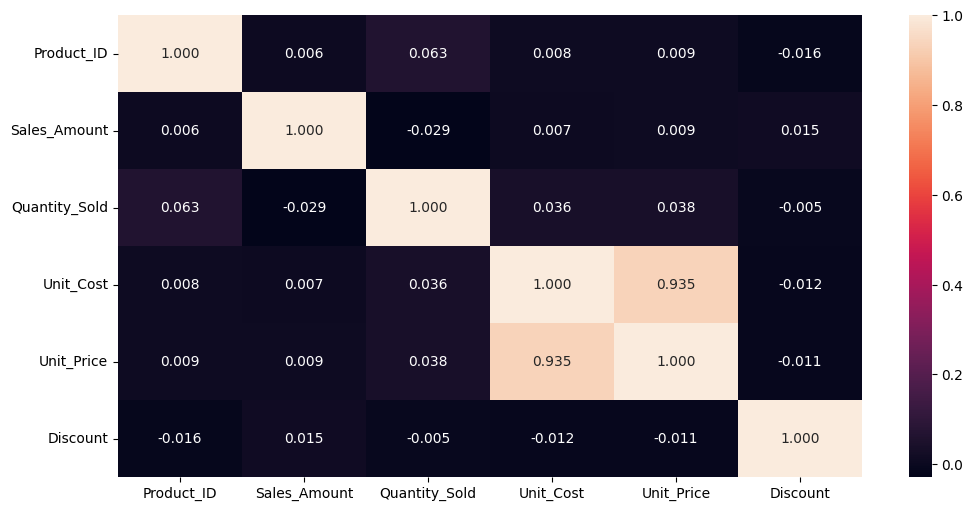

In [19]:
import scipy

plt.figure(figsize = (12, 6))
corr_matrix = df.corr(numeric_only = True, method = "kendall")

sns.heatmap(data = corr_matrix, annot = True, fmt = ".3f")
plt.show()

## Daily and Monthly Sales Trends

In [20]:
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'])

df["day_of_week"] = df["Sale_Date"].dt.day_name()
df["month"] = df["Sale_Date"].dt.month_name()
df["year"] = df["Sale_Date"].dt.year

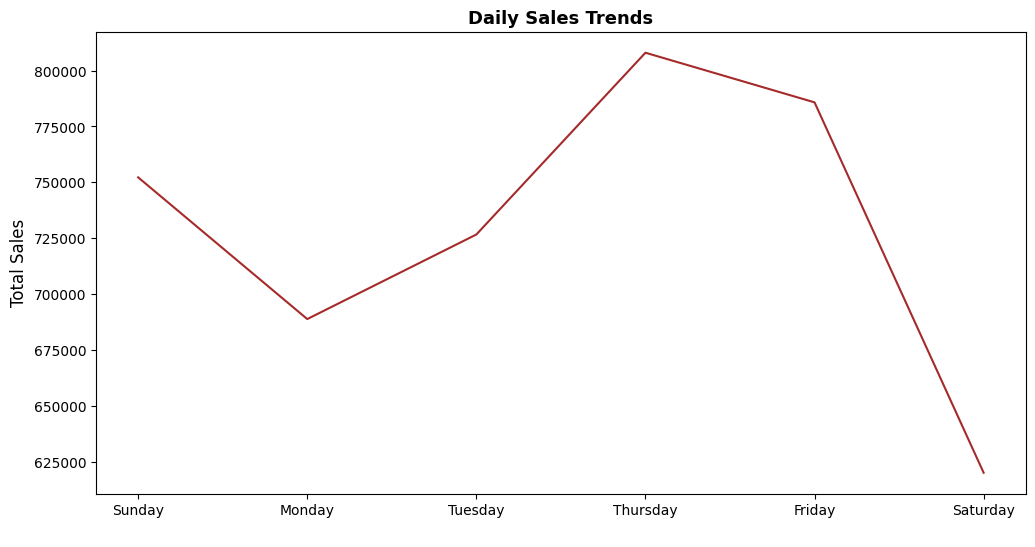

In [21]:
# Analyze total sales by day of the week
daily_sales = df.groupby("day_of_week")["Sales_Amount"].sum().reset_index()
daily_sales["day_of_week"] = daily_sales["day_of_week"].astype(str)

days_order = ["Sunday", "Monday", "Tuesday", "Thursday", "Friday", "Saturday"]
daily_sales["day_of_week"] = pd.Categorical(daily_sales["day_of_week"], categories = days_order, ordered = True)

plt.figure(figsize = (12, 6))
sns.lineplot(daily_sales, x = "day_of_week", y = "Sales_Amount", color = "brown")
plt.title("Daily Sales Trends", weight = "bold", size = 13)
plt.xlabel(" ")
plt.ylabel("Total Sales", size = 12)
plt.show()

In [22]:
#monthly sales
monthly_sales = df.groupby("month")["Sales_Amount"].sum().reset_index()
monthly_sales['month'] = monthly_sales['month'].astype(str) 
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Convert month column to categorical type
monthly_sales['month'] = pd.Categorical(monthly_sales['month'], categories=month_order, ordered=True)

# Sort by calendar order
monthly_sales = monthly_sales.sort_values('month')

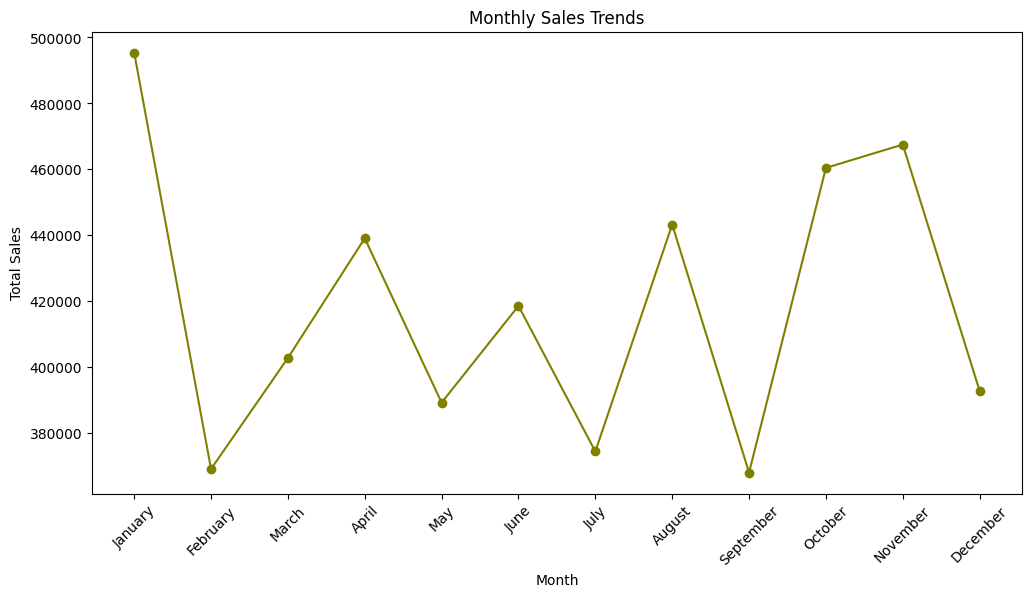

In [23]:
plt.figure(figsize = (12, 6))
ax = plt.plot(monthly_sales['month'], monthly_sales['Sales_Amount'], marker='o', color = "olive")
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()